In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,r_studio,spark,aws,excel
0,Data Scientist,Employer Provided Salary:$130K - $160K,Job Title: Data Scientist\nExperience Levels: ...,4.5,Quiet Professionals LLC\n4.5,"Doral, FL",201 to 500 Employees,2013,Company - Private,Aerospace & Defense,...,160,145.0,Quiet Professionals LLC,FL,10,0,0,0,0,0
1,Data Scientist (V),Employer Provided Salary:$140K - $180K,DCI Job Requirement for:\nData Scientist\nLoca...,3.7,DCI Solutions\n3.7,"Aberdeen, MD",1 to 50 Employees,-1,Contract,-1,...,180,160.0,DCI Solutions,MD,-1,0,0,0,0,0
2,Polymer Lab Specialist Level 3,Employer Provided Salary:$92K,Additive Manufacturing Polymer Lab Specialist ...,-1.0,Center Street Technologies,"Youngstown, OH",-1,-1,-1,-1,...,92,92.0,Center Street Technologies,OH,-1,0,0,0,0,0
3,Operations Planning & Analysis Manager,Employer Provided Salary:$95K - $110K,General Definition: The role of the Operationa...,-1.0,"Global Gaming Solutions, LLC","Oklahoma City, OK",-1,-1,-1,-1,...,110,102.5,"Global Gaming Solutions, LLC",OK,-1,0,0,0,0,0
4,Senior Data Scientist,$111K - $149K (Glassdoor est.),Senior Data Scientist\nGreensea is revolutioni...,5.0,Greensea Systems\n5.0,"Plymouth, MA",1 to 50 Employees,2006,Company - Private,Computer Hardware Development,...,149,130.0,Greensea Systems,MA,17,0,0,0,0,0


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided_salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [8]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [9]:
df.job_simp.value_counts()

data scientist    634
na                137
analyst            78
manager            58
director           29
data engineer       1
mle                 1
Name: job_simp, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        686
senior    251
jr          1
Name: seniority, dtype: int64

In [11]:
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

DC    159
PA     83
VA     76
CA     69
-1     66
MA     64
FL     63
MD     62
TX     46
NM     43
IL     43
OH     35
CT     30
OK     28
MO     20
WI     11
NY      8
KS      7
GA      5
AL      3
SC      3
NJ      2
NC      2
IN      2
NE      2
MI      2
UT      1
ME      1
MS      1
WA      1
Name: job_state, dtype: int64

In [12]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       703
1       299
2       839
3       848
4      1372
       ... 
933     839
934     299
935     703
936    1397
937    1286
Name: desc_len, Length: 938, dtype: int64

In [16]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [17]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [18]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [19]:
df['company_txt']

0           Quiet Professionals LLC
1                     DCI Solutions
2        Center Street Technologies
3      Global Gaming Solutions, LLC
4                  Greensea Systems
                   ...             
933      Center Street Technologies
934                   DCI Solutions
935         Quiet Professionals LLC
936            Near-Miss Management
937                UTHealth Houston
Name: company_txt, Length: 938, dtype: object

In [20]:
df.describe()

,Rating,Founded,hourly,employer_provided_salary,min_salary,max_salary,avg_salary,age,python_yn,r_studio,spark,aws,excel,desc_len
count,938.000000,938.000000,938.0,938.0,938.000000,938.000000,938.000000,938.000000,938.000000,938.0,938.000000,938.000000,938.000000,938.000000
mean,1.911514,928.244136,0.0,0.0,107.446695,143.950959,125.698827,19.649254,0.179104,0.0,0.069296,0.077825,0.219616,1322.618337
std,2.454520,989.398501,0.0,0.0,36.978690,52.845840,44.148322,32.101620,0.383644,0.0,0.254093,0.268039,0.414207,1188.489646
min,-1.000000,-1.000000,0.0,0.0,21.000000,21.000000,21.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,121.000000
25%,-1.000000,-1.000000,0.0,0.0,81.000000,110.000000,99.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,711.000000
50%,3.700000,-1.000000,0.0,0.0,100.000000,136.000000,118.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1046.000000
75%,3.900000,1979.000000,0.0,0.0,130.000000,160.000000,145.000000,30.750000,0.000000,0.0,0.000000,0.000000,0.000000,1372.000000
max,5.000000,2018.000000,0.0,0.0,200.000000,350.000000,262.500000,236.000000,1.000000,0.0,1.000000,1.000000,1.000000,9369.000000


In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided_salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

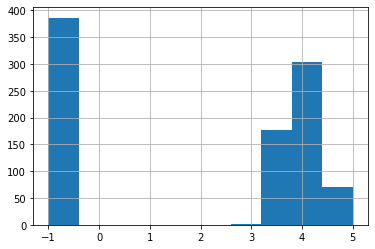

In [22]:
df.Rating.hist()

<AxesSubplot:>

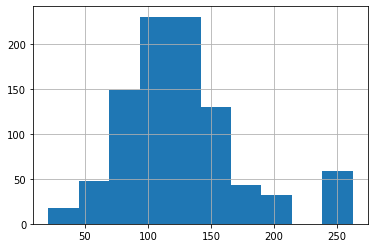

In [23]:
df.avg_salary.hist()

<AxesSubplot:>

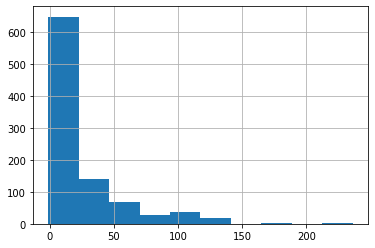

In [24]:
df.age.hist()

<AxesSubplot:>

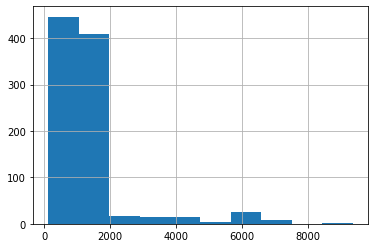

In [25]:
df.desc_len.hist()

<AxesSubplot:>

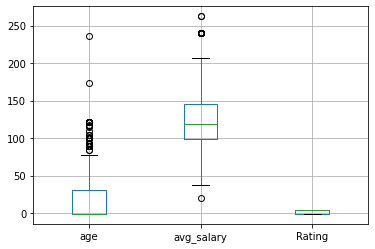

In [26]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

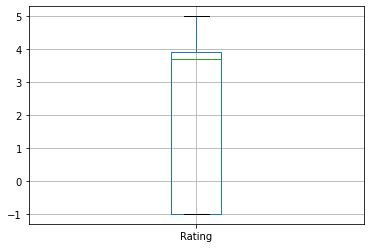

In [27]:
df.boxplot(column = 'Rating')

In [28]:
df[['age','avg_salary','Rating','desc_len']].corr()


,age,avg_salary,Rating,desc_len
age,1.000000,-0.062174,0.502069,0.283016
avg_salary,-0.062174,1.000000,-0.000405,-0.136391
Rating,0.502069,-0.000405,1.000000,0.265861
desc_len,0.283016,-0.136391,0.265861,1.000000


<AxesSubplot:>

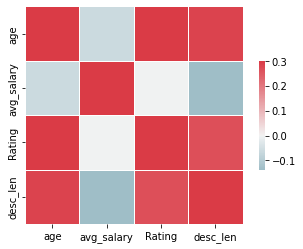

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided_salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [32]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python_yn', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 81


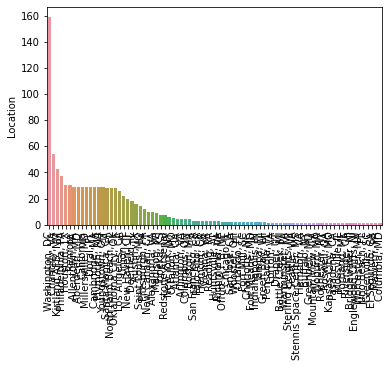

graph for Size: total = 9


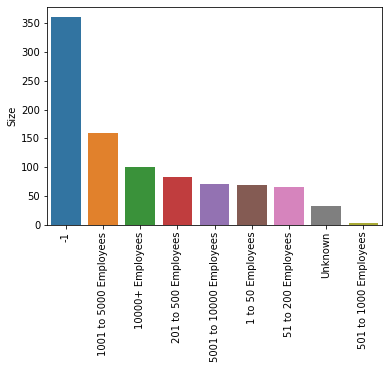

graph for Type of ownership: total = 10


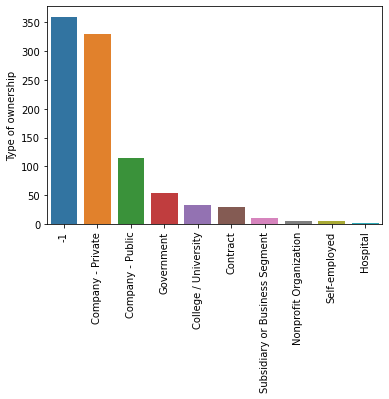

graph for Industry: total = 40


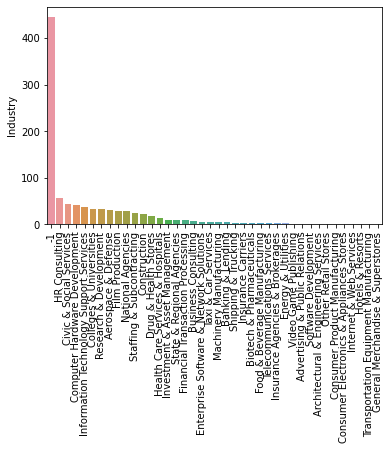

graph for Sector: total = 20


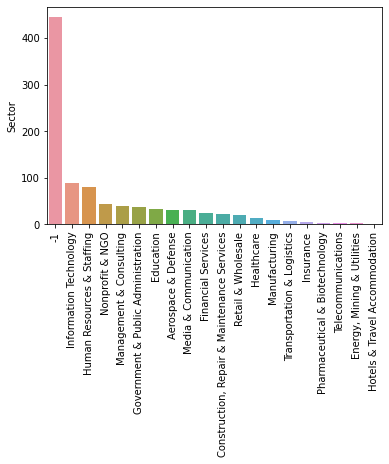

graph for Revenue: total = 11


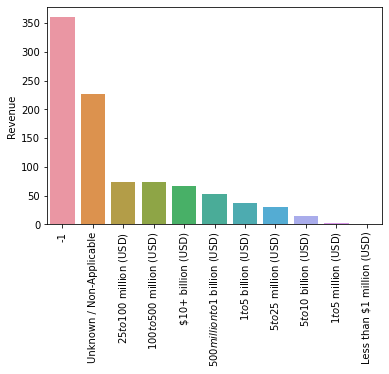

graph for company_txt: total = 108


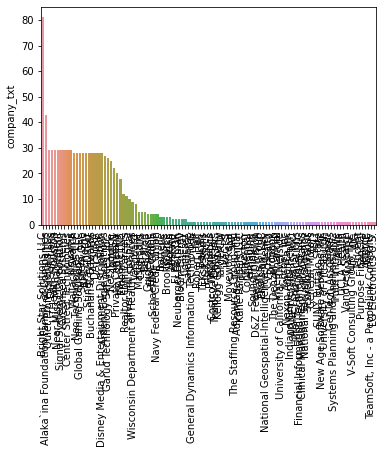

graph for job_state: total = 30


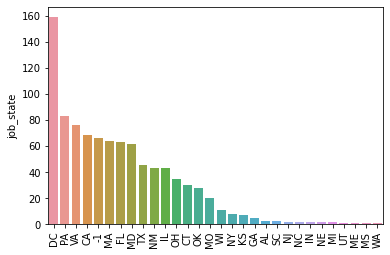

graph for python_yn: total = 2


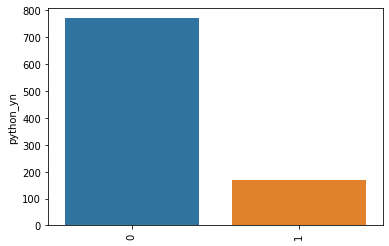

graph for r_studio: total = 1


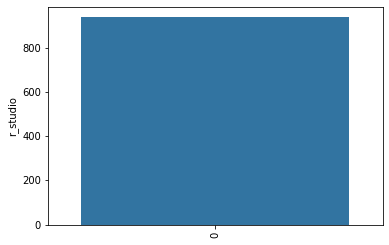

graph for spark: total = 2


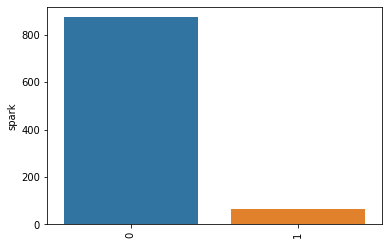

graph for aws: total = 2


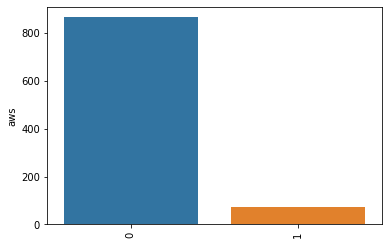

graph for excel: total = 2


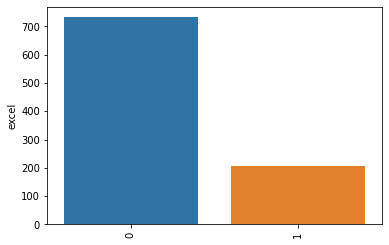

graph for job_simp: total = 7


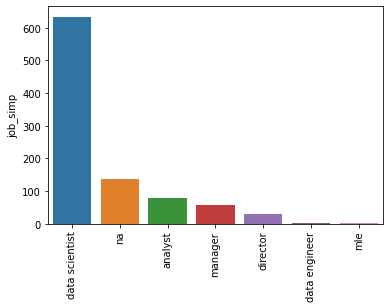

graph for seniority: total = 3


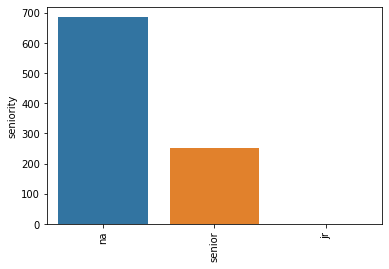

In [33]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


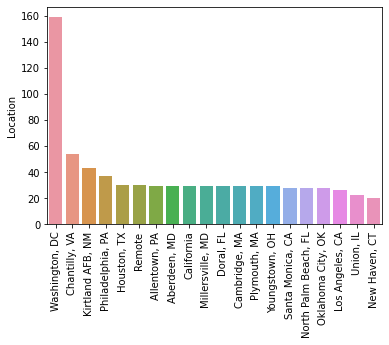

graph for company_txt: total = 20


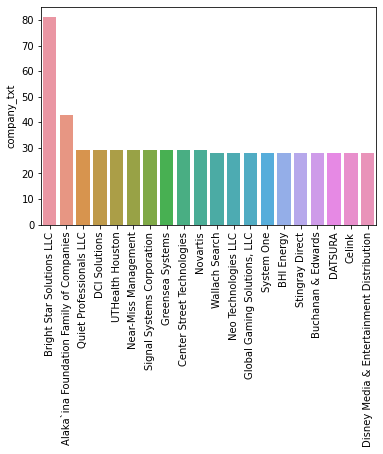

In [35]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [36]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,99.108974
data engineer,90.500000
data scientist,129.820978
director,240.000000
manager,123.577586
mle,130.000000
na,98.689781


In [37]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          99.108974
data engineer  na          90.500000
data scientist jr         100.000000
               na         117.955275
               senior     156.233503
director       na         240.000000
manager        na         123.577586
mle            na         130.000000
na             na          88.331325
               senior     114.611111

In [38]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WI        data scientist   53.318182
WA        data scientist  133.000000
VA        na              119.481481
          data scientist  159.091837
UT        data scientist  134.500000
TX        na              101.000000
          data scientist  112.071429
          analyst         125.000000
SC        data scientist  107.000000
PA        data scientist  109.060976
          na               89.500000
OK        manager         102.500000
OH        na               92.000000
          data scientist  102.333333
NY        na               21.000000
          data scientist  190.833333
          data engineer    90.500000
NM        na              111.000000
          data scientist  106.500000
NJ        data scientist  144.750000
NE        data scientist  190.000000
NC        data scientist   81.000000
MS        data scientist   86.000000
MO        data scientist  113.225000
MI        data scientist  139.500000
          analyst          51.500000
ME        data scientist  102.500000
MD        data scientist  144.379032
MA        director        240.000000
          data scientist  128.957143
KS        data scientist  117.500000
IN        data scientist  101.000000
IL        data scientist  131.761905
          analyst          75.000000
GA        data scientist  126.250000
          na               94.000000
FL        data scientist  137.073529
          analyst          90.500000
          manager          92.500000
DC        manager         145.000000
          data scientist  153.735849
          analyst         130.000000
CT        na               62.500000
          data scientist  126.000000
CA        na              135.000000
          data scientist  128.117647
AL        data scientist  132.666667
-1        mle             130.000000
          data scientist  107.007692

In [39]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [40]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        data scientist          11
WA        data scientist           1
VA        na                      27
          data scientist          49
UT        data scientist           1
TX        na                      29
          data scientist          14
          analyst                  3
SC        data scientist           3
PA        data scientist          82
          na                       1
OK        manager                 28
OH        na                      29
          data scientist           6
NY        na                       1
          data scientist           6
          data engineer            1
NM        na                      28
          data scientist          15
NJ        data scientist           2
NE        data scientist           2
NC        data scientist           2
MS        data scientist           1
MO        data scientist          20
MI        data scientist           1
          analyst                  1
ME        data scientist           1
MD        data scientist          62
MA        director                29
          data scientist          35
KS        data scientist           7
IN        data scientist           2
IL        data scientist          21
          analyst                 22
GA        data scientist           4
          na                       1
FL        data scientist          34
          analyst                 28
          manager                  1
DC        manager                 29
          data scientist         106
          analyst                 24
CT        na                      20
          data scientist          10
CA        na                       1
          data scientist          68
AL        data scientist           3
-1        mle                      1
          data scientist          65

In [41]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
NY,190.833333
NE,190.000000
VA,159.091837
DC,153.735849
NJ,144.750000
MD,144.379032
MI,139.500000
FL,137.073529
UT,134.500000


In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided_salary',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'r_studio', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [44]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','hourly', 'employer_provided_salary', 'python_yn', 'r_studio', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]


In [45]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.8    183.750000
 4.0    179.298507
 3.1    172.500000
 4.1    146.645833
 4.5    141.287879
 2.8    134.500000
 4.4    133.333333
 3.7    132.815534
 5.0    130.000000
 3.2    129.500000
-1.0    126.248705
 3.4    122.600000
 3.9    120.185393
 4.2    117.051724
 3.6    108.833333
 3.5     99.128571
 3.8     91.809524
 4.6     76.500000
 4.3     74.609375
 3.3     45.000000
Industry
                                          avg_salary
Industry                                            
Enterprise Software & Network Solutions   193.083333
Energy & Utilities                        177.000000
Film Production                           174.500000
Aerospace & Defense                       144.354839
Banking & Lending                         144.200000
Investment & Asset Management             143.400000
Computer Hardware Development             136.047619
-1                                        135.864045
Biotech & Pharmaceuticals           

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [46]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')


python_yn,0,1
Revenue,,
$1 to $5 billion (USD),37.0,1.0
$1 to $5 million (USD),3.0,NaN
$10+ billion (USD),62.0,4.0
$100 to $500 million (USD),6.0,67.0
$25 to $100 million (USD),71.0,2.0
$5 to $10 billion (USD),12.0,2.0
$5 to $25 million (USD),31.0,NaN
$500 million to $1 billion (USD),25.0,28.0
-1,303.0,57.0


In [47]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

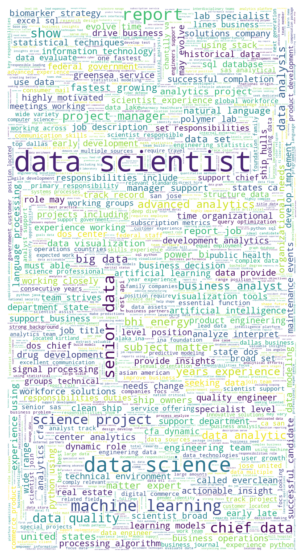

In [49]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()